### Harshit Gola
___
# Support Vector Machines Project 


## The Data
For this series of lectures, we will be using the famous [Iris flower data set]

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Using seaborn to get the iris data by using: iris = sns.load_dataset('iris') **

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


## Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Creating a pairplot of the data set. Which flower species seems to be the most separable?**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


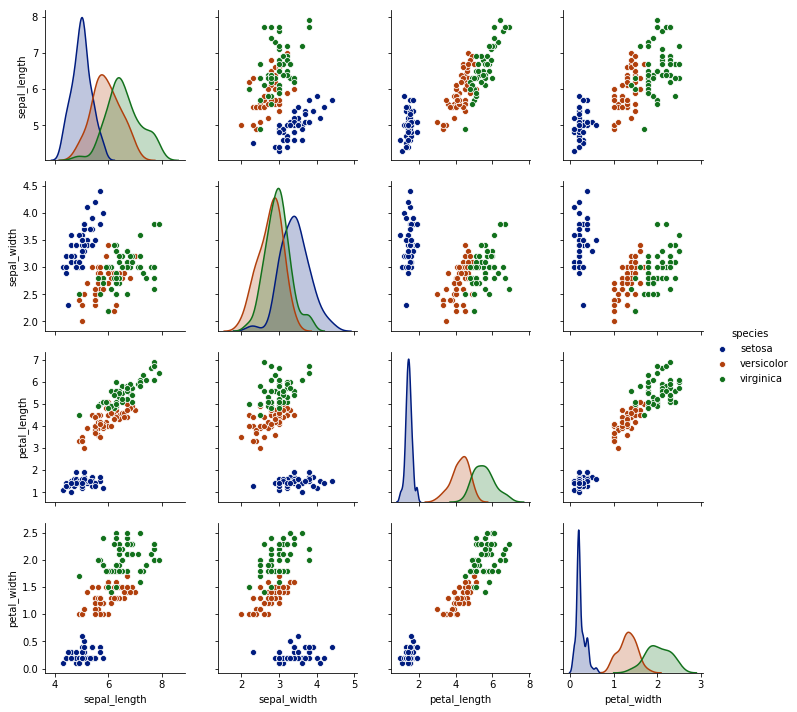

In [5]:
sns.pairplot(iris, hue ='species', palette='dark')

**Creating a kde plot of sepal_length versus sepal width for setosa species of flower.**

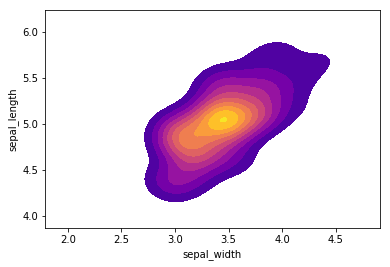

In [6]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=iris[['species']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train a Model

**Call the SVC() model from sklearn and fit the model to the training data.**

In [10]:
from sklearn.svm import SVC

In [11]:
model=SVC()

In [12]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Evaluation

**Getting predictions from the model and create a confusion matrix and a classification report.**

In [13]:
predictions=model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print('\n Confusion Matrix: \n', confusion_matrix(y_test, predictions))


 Confusion Matrix: 
 [[17  0  0]
 [ 0 15  1]
 [ 0  1 16]]


In [16]:
print('\n Classification Report: \n', classification_report(y_test, predictions))


 Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.94      0.94      0.94        16
   virginica       0.94      0.94      0.94        17

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Let's see if we can tune the parameters to try to get even better

## Gridsearch

** Import GridsearchCV from SciKit Learn.**

In [17]:
from sklearn.model_selection import GridSearchCV

**Creating a dictionary called param_grid and fill out some parameters for C and gamma.**

In [18]:
param_grids={'C':[0.1, 1, 10, 100 ], 'gamma':[0.01, 0.001, 0.0001]}

In [19]:
grid=GridSearchCV(SVC(), param_grids, refit=True, verbose=2)

** Creating a GridSearchCV object and fit it to the training data.**

In [20]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ...........

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklea

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

** Now taking that grid model and creating some predictions using the test set **

In [22]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

[[17  0  0]
 [ 0 16  0]
 [ 0  2 15]]


In [23]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.88      0.94        17

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [24]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [25]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Achieved greater Efficiency using Gridsearch Parameters (C and gamma values)